## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.
 
<font color="red">Note: Your assignment would not be graded if this step is not done. </font>

In [80]:
# Your code
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

#load dataset
seed = 430131
data = pd.read_csv("./flights_classifying/flights_classifying.csv")
sampled_data = data.sample(frac=0.95, random_state = seed)
sampled_data.to_csv("./output/sampled_data.csv")

## Question 1 - Insights into the Data (20 points):

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. You are more than welcome to provide a deeper analysis and generate more visualizations to understand the data better. Please follow the next two parts.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled. Explain the difference.

In [82]:
# Your code

cancelation_reason_unique_values = sampled_data['CANCELLATION_REASON'].unique()
print("Unique values for cancelation reason in the sampled_data: ", sampled_data['CANCELLATION_REASON'].unique())

s1 = sampled_data.loc[sampled_data['CANCELLED'] == 1, 'CANCELLATION_REASON'].unique()
s2 = sampled_data.loc[sampled_data['CANCELLED'] == 0, 'CANCELLATION_REASON'].unique()


print("Unique values for cancelation reason in the sampled_data for canceled flights ",s1)
print("Unique values for cancelation reason in the sampled_data for flights not canceled",s2)

#Reference of cancellation reason 
# https://www.kaggle.com/usdot/flight-delays?select=flights.csv

Unique values for cancelation reason in the sampled_data:  ['N' 'C' 'B' 'A' 'D']
Unique values for cancelation reason in the sampled_data for canceled flights  ['C' 'B' 'A' 'D']
Unique values for cancelation reason in the sampled_data for flights not canceled ['N']


    Your answer:
<hr>
Unique values for cancelation reason in the sampled_data:  ['N' 'B' 'A' 'C' 'D']. 

 * A - Airline/Carrier delay
 * B - Weather delay
 * C - National Air System delay 
 * D - Security delay
 * N - No reason (because there is no cancellation).


Unique values for cancelation reason in the sampled_data for canceled flights  are ['B' 'A' 'C' 'D']

Unique values for cancelation reason in the sampled_data for flights not canceled are ['N']

We can thus infer that flights were cancelled either because of A (Airline/Carrier delay, Weather delay, ), B (Weather delay), C (National Air System delay), D (Security delay). Unique values for cancelation reason for flights not canceled is 'N', which correctly corresponds to no reason for delay
<hr>

#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>. Can you explain the difference? 

In [83]:
# Your code
no_null_data = sampled_data.dropna(axis=0, how="any")

cancelation_reason_Sampled_data = sampled_data['CANCELLATION_REASON'].unique()
cancelation_reason_no_null_data = no_null_data['CANCELLATION_REASON'].unique()
print("Unique values for cancelation reason in sampled_data" ,cancelation_reason_Sampled_data)
print("Unique values for cancelation reason in no_null_data", cancelation_reason_no_null_data)

Unique values for cancelation reason in sampled_data ['N' 'C' 'B' 'A' 'D']
Unique values for cancelation reason in no_null_data ['N']


In [88]:
no_null_data.to_csv("./output/no_null_data.csv")

In [85]:
sampled_data[sampled_data['CANCELLATION_REASON']=='N'].isnull().sum()

Unnamed: 0                      0
Unnamed: 0.1                    0
Unnamed: 0.1.1                  0
YEAR                            0
MONTH                           0
DAY                             0
DAY_OF_WEEK                     0
AIRLINE                         0
FLIGHT_NUMBER                   0
TAIL_NUMBER                     0
ORIGIN_AIRPORT                  0
DESTINATION_AIRPORT             0
SCHEDULED_DEPARTURE             0
DEPARTURE_TIME                  0
DEPARTURE_DELAY                 0
TAXI_OUT                        0
WHEELS_OFF                      0
SCHEDULED_TIME                  0
ELAPSED_TIME                    0
AIR_TIME                        0
DISTANCE                        0
WHEELS_ON                       0
TAXI_IN                         0
SCHEDULED_ARRIVAL               0
ARRIVAL_TIME                    0
ARRIVAL_DELAY                   0
DIVERTED                        0
CANCELLED                       0
CANCELLATION_REASON             0
AIR_SYSTEM_DEL

    Your answer:
<hr>

* Unique values for cancelation reason in sampled_data ['N' 'B' 'A' 'C' 'D']
* Unique values for cancelation reason in no_null_data ['N']

As seen from the query output above, data points where flights were not cancelled has no null values, while the other data points with cancelled flights have null values.
<hr>

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

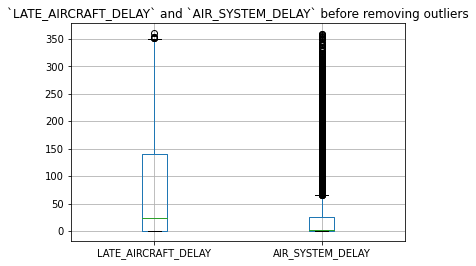

In [136]:
# Your code
ev_data = no_null_data[(no_null_data['AIRLINE']=='EV')&(no_null_data['ARRIVAL_DELAY'] >=120)&(no_null_data['ARRIVAL_DELAY'] <=360)]
ev_data.to_csv("./output/ev_data.csv")
bxplot = ev_data.boxplot(column=['LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY'])
plt.title("`LATE_AIRCRAFT_DELAY` and `AIR_SYSTEM_DELAY` before removing outliers")
plt.savefig("./output/Q1c_Before_cleaning_outliers.png")
plt.show()

# remove outliers using boxplot
q1_late_aircraft = ev_data['LATE_AIRCRAFT_DELAY'].quantile(0.25)
q3_late_aircraft = ev_data['LATE_AIRCRAFT_DELAY'].quantile(0.75)
iqr_late_aircraft = q3_late_aircraft - q1_late_aircraft
upper_limit_late_aircraft = q3_late_aircraft + 1.5 * iqr_late_aircraft
lower_limit_late_aircraft = q1_late_aircraft - 1.5 * iqr_late_aircraft
cleaned_data_late_aircraft = ev_data.loc[(ev_data['LATE_AIRCRAFT_DELAY'] > lower_limit_late_aircraft) & (ev_data['LATE_AIRCRAFT_DELAY'] < upper_limit_late_aircraft)]

q1_air_system_delay = ev_data['AIR_SYSTEM_DELAY'].quantile(0.25)
q3_air_system_delay = ev_data['AIR_SYSTEM_DELAY'].quantile(0.75)
iqr_air_system = q3_air_system_delay - q1_air_system_delay

upper_limit_air_system_delay = q3_air_system_delay + 1.5 * iqr_air_system
lower_limit_air_system_delay = q1_air_system_delay - 1.5 * iqr_air_system
cleaned_data_air_system = ev_data.loc[(ev_data['AIR_SYSTEM_DELAY'] > lower_limit_air_system_delay) & (ev_data['AIR_SYSTEM_DELAY'] < upper_limit_air_system_delay)]


cleaned_data_air_system.to_csv("./output/cleaned_data_air_system.csv")
cleaned_data_late_aircraft.to_csv("./output/cleaned_data_late_aircraft.csv")

#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>. 

Interpret the differences for these statistical values between these three datasets. 

In [9]:
# Your code
def _return_statistics(series_tuple_list):
    result_df = pd.DataFrame(columns = ["series_name", "median", "mean", "mode", "standard_deviation", "variance"])
    for series, series_name in series_tuple_list:
        temp_row  = {
            "series_name" : series_name,
            "median" : series.median(),
            "mean" : series.mean(),
            "mode" : series.mode()[0],
            "standard_deviation" : series.std(),
            "variance" : series.var()
        }
        result_df = result_df.append(temp_row, ignore_index=True)
    return result_df
_return_statistics([
    (ev_data['ARRIVAL_DELAY'], "ev_data"),
    (cleaned_data_late_aircraft['ARRIVAL_DELAY'], "cleaned_data_late_aircraft"),
    (cleaned_data_air_system['ARRIVAL_DELAY'], "cleaned_data_air_system")])

,series_name,median,mean,mode,standard_deviation,variance
0,ev_data,183.0,193.287546,120.0,57.852098,3346.865228
1,cleaned_data_late_aircraft,183.0,193.121710,120.0,57.649679,3323.485442
2,cleaned_data_air_system,182.5,192.753849,120.0,58.027372,3367.175890


    Your answer: 
<hr>
    After removing outliers for `LATE_AIRCRAFT_DELAY` and `AIR_SYSTEM_DELAY`, we see that the mean and standard deviation of variable `ARRIVAL_DELAY` has slightly decreased signifying that the target variable would be easier to model.
<hr>    

### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

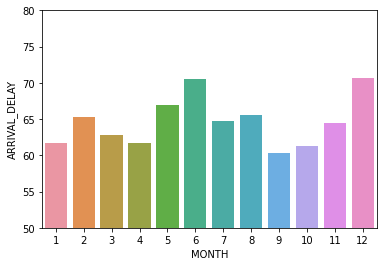

In [132]:
# Your code
import matplotlib.pyplot as plt
arrival_delay_per_month = no_null_data.groupby('MONTH', as_index=False)['ARRIVAL_DELAY'].mean()

bar_plot = sns.barplot(x="MONTH", y="ARRIVAL_DELAY", data=arrival_delay_per_month, estimator=np.mean)
bar_plot.set_ylim(50,80)
bar_plot.figure.savefig("./output/Q1_part2a_Mean_visualization.png", bbox_inches='tight')

    Your answer:
<hr>

From the graph :
* Best months to book ticket (Minimum Arrival delay): September, October
* Worst months to book ticket (Maximum Arrival delay): June, December

<hr>

#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>. Which month has the minimum and which month has the maximum average weatherdelay? 

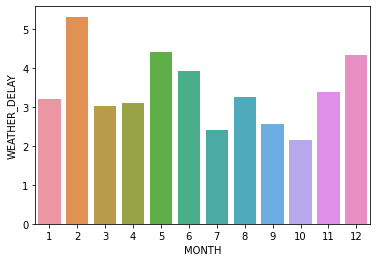

In [104]:
# Your code
monthly_avg_weather_delay = no_null_data.groupby('MONTH', as_index=False)['WEATHER_DELAY'].mean()
sns.barplot(x="MONTH", y="WEATHER_DELAY", data=monthly_avg_weather_delay,estimator=np.mean)
plt.savefig("./output/Q1_part2b_Mean_visualization.png", bbox_inches='tight')

    Your answer:
<hr>

* October has minimum weather delay.
* February has maximum weather delay.

<hr>

#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

    Your answer:

<hr>

* The arrival delay is significantly large in Feb, May, June and December. 
* The Weather delay for the corresponding months is also among the highest. 
* The arrival delay is comparatively lower in September and October, the weather delay for the  two months is also comparatively low. 

Conclusion:
1. General trend (Arrival Delay per month): There's a maxima in February, the delay drops to a minima in April, reaches maxima in June, drops to a minima in September and again reaches maxima in December
2. General trend (Weather Delay per month): There's maxima in February, the delay drops to a minima during March April, reaches maxima in May, June and again a Maxima in December
3. From this, we can infer that there is positive correlation between weather delay and arrival delay.


<hr>
    

#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month. Based on this information, which combination of days of week and months should be avoided to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of week and months.

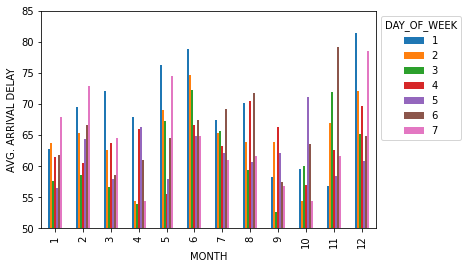

<Figure size 432x288 with 0 Axes>

In [131]:
# Your code
arrival_delay_per_weekday_per_month = no_null_data.groupby(['MONTH', 'DAY_OF_WEEK'])['ARRIVAL_DELAY'].mean().unstack()
arrival_delay_per_weekday_per_month_plot = arrival_delay_per_weekday_per_month.plot(xlabel = "MONTH", ylabel = "AVG. ARRIVAL DELAY", kind="bar", ylim= (50, 85)).legend(title = "DAY_OF_WEEK", bbox_to_anchor=(1.0, 1.0))
plt.show()
plt.savefig("./output/Q1_part2d.png", bbox_inches='tight')

    Your answer:
<hr>

From the graph, it can be seen that the following combinations of months and days of week should be avoided (with avg. arrival delay in descending order): 
1. (December,1st Day of the week)
2. (December,7th Day of the Week)
3. (November,6th Day of the week)
4. (June,1st Day of the week)
5. (May,1st Day of the week)
<hr>

#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.

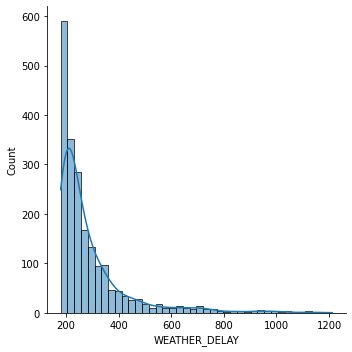

In [106]:
# Your code
sns.displot(data=no_null_data[no_null_data['WEATHER_DELAY'] >= 180], x='WEATHER_DELAY', kde=True, bins=40)
plt.savefig("./output/Q1_part2e.png", bbox_inches='tight')

#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

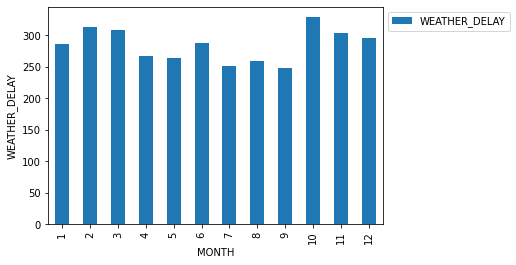

In [107]:
# Your code
weather_delay_more_than_180 = no_null_data[no_null_data['WEATHER_DELAY'] >= 180].groupby(['MONTH']).agg({'WEATHER_DELAY':'mean'})
weather_delay_more_than_180.plot(xlabel = "MONTH", ylabel = "WEATHER_DELAY",  kind="bar").legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("./output/Q1_part2f.png", bbox_inches='tight')

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

C:\Users\Anurag\anaconda3\envs\common_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anurag\anaconda3\envs\common_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


       WEATHER_DELAY  ARRIVAL_DELAY
count     446.000000     446.000000
mean       26.029148     463.652466
std        96.836763     119.415535
min         0.000000     361.000000
25%         0.000000     389.000000
50%         0.000000     424.500000
75%         0.000000     491.250000
max       510.000000    1142.000000


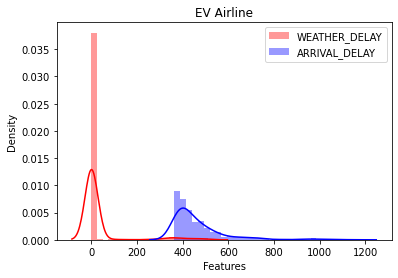

In [141]:
# Your code
joint_distribution_data = no_null_data[(no_null_data['ARRIVAL_DELAY'] > 360) & ((no_null_data['AIRLINE'] == "EV") | (no_null_data['AIRLINE'] == "VX"))]
fig, axes = plt.subplots()
sns.distplot(joint_distribution_data[joint_distribution_data['AIRLINE']=='EV']['WEATHER_DELAY'], ax=axes, kde=True, color="red", label="WEATHER_DELAY")
sns.distplot(joint_distribution_data[joint_distribution_data['AIRLINE']=='EV']['ARRIVAL_DELAY'], ax=axes, kde=True, color="blue", label="ARRIVAL_DELAY")
print(f"{joint_distribution_data[joint_distribution_data['AIRLINE']=='EV'].filter(['WEATHER_DELAY', 'ARRIVAL_DELAY']).describe()}")
axes.set_xlabel("Features")
axes.set_title("EV Airline")
plt.legend()
plt.savefig("./output/Q1_part2g.png", bbox_inches='tight')

       WEATHER_DELAY  ARRIVAL_DELAY
count      19.000000      19.000000
mean        8.105263     430.210526
std        24.188828      74.791249
min         0.000000     364.000000
25%         0.000000     381.500000
50%         0.000000     413.000000
75%         0.000000     439.500000
max        96.000000     651.000000


C:\Users\Anurag\anaconda3\envs\common_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anurag\anaconda3\envs\common_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


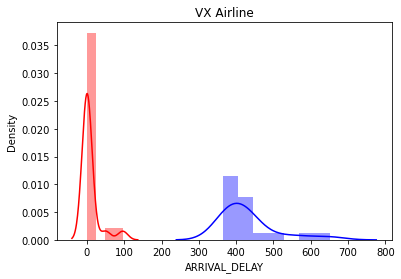

In [143]:
fig2, axes2 = plt.subplots()
print(f"{joint_distribution_data[joint_distribution_data['AIRLINE']=='VX'].filter(['WEATHER_DELAY', 'ARRIVAL_DELAY']).describe()}")
sns.distplot(joint_distribution_data[joint_distribution_data['AIRLINE']=='VX']['WEATHER_DELAY'], ax=axes2, kde=True, color="red", label="WEATHER_DELAY")
sns.distplot(joint_distribution_data[joint_distribution_data['AIRLINE']=='VX']['ARRIVAL_DELAY'], ax=axes2, kde=True, color="blue", label="ARRIVAL_DELAY")
axes2.set_title("VX Airline")
plt.savefig("./output/Q1_part2e.png", bbox_inches='tight')
plt.show()

       Your answer:
       
<hr>
For flights of airline `EV` the average `weather delay` and `arrival delay` is more in comparsion to flight with airline `VX`. Also, standard deviation is bit high with flights of airline `EV `.

<hr>

## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [91]:
# Your code
decision_tree_dataset = no_null_data[(no_null_data['AIRLINE']== "UA") & (no_null_data['ARRIVAL_DELAY'] > 0)]
decision_tree_dataset.loc[:,'DELAY'] = np.where(decision_tree_dataset['ARRIVAL_DELAY'] <= 45, 'acceptable_delay', 'unacceptable_delay')
decision_tree_dataset.loc[:,'DISTANCE_CATEGORY'] = pd.qcut(decision_tree_dataset['DISTANCE'].to_numpy(), 2,  labels=["short", 'long'])
decision_tree_dataset.to_csv("./output/decision_tree_dataset.csv")

#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
C:\Users\Anurag\anaconda3\envs\common_env\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
Error: Could not open "visualTree.gv.pdf" for writing : Permission denied


You either have not installed the 'dot' to visualize the decision tree or the reulted .pdf file is open!


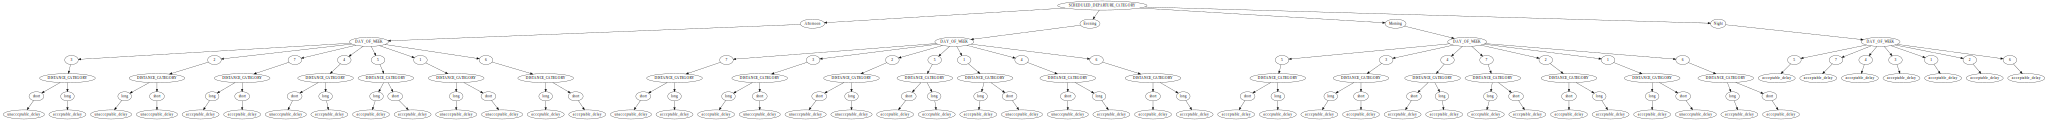

System entropy:  0.9982563483150829
System gini:  None


In [149]:
# Your code
import pip
pip.main(['install', 'p_decision_tree'])
from p_decision_tree.DecisionTree import DecisionTree
required_features_dataset = decision_tree_dataset[['SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', 'DAY_OF_WEEK', 'DELAY']]
required_features = required_features_dataset.columns
descriptive_features = required_features[:-1]
target_label = required_features[-1]

for column in required_features:
    decision_tree_dataset[column]= decision_tree_dataset[column].astype(str)

descriptive_data = decision_tree_dataset[descriptive_features].values
label_values = decision_tree_dataset[target_label].values

decisionTree  = DecisionTree(descriptive_data.tolist(), descriptive_features.tolist(), label_values.tolist(), "entropy")

decisionTree.id3(0,1000)
dot = decisionTree.print_visualTree(render=True)
display(dot)
print("System entropy: ", decisionTree.entropy)
print("System gini: ", decisionTree.gini)


#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

    Your answer:
    
<hr>

The best feature for splitting the tree in the second round of ID3 is "DAY_OF_WEEK"

<hr>

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

    Your answer:
<hr>

Following are the 2 rules leading to unacceptable delay: 

 1. If(SCHEDULED_DEPARTURE_CATEGORY = Afternoon) AND (DAY_OF_WEEK = 2) AND (DISTANCE_CATEGORY = Short) THEN CLASS unacceptable_delay
 
    If the flight is scheduled for Afternoon on the 2nd day of the week and the flight's distance category is Short, the delay is unacceptable.

 2. If(SCHEDULED_DEPARTURE_CATEGORY = Evening) AND (DAY_OF_WEEK = 1) AND (DISTANCE_CATEGORY = Short) THEN CLASS unacceptable_delay 
 
    If the flight is scheduled for Evening on the 1st day of the week and the flight's distance category is Short, the delay is unacceptable.

<hr>

## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [2]:
# Your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the data from given CSV
dataset = pd.read_csv("../data/flights_classifying.csv")

In [3]:
dataset.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY,REIMBURSMENT
0,0,661456,719293,2015,7,18,6,DL,1962,N974AT,...,N,21.0,0.0,0.0,0.0,0.0,199,28,Morning,0
1,1,110441,149900,2015,6,30,2,OO,5157,N768SK,...,N,0.0,0.0,0.0,51.0,0.0,181,25,Evening,0
2,2,129096,802487,2015,5,12,2,EV,2632,N684JW,...,N,6.0,0.0,1.0,9.0,0.0,132,18,Afternoon,0


Randomly order the data points using one of the group member's students as the random state.

In [4]:
# Your code
shuffled_dataset = dataset.sample(frac=1, random_state=416574)
shuffled_dataset.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY,REIMBURSMENT
418314,418314,428125,926845,2015,8,13,4,WN,1128,N633SW,...,N,8.0,0.0,2.0,31.0,0.0,225,32,Morning,0
349959,349959,177755,490782,2015,12,3,4,DL,2443,N942AT,...,N,0.0,0.0,0.0,139.0,0.0,337,48,Afternoon,0
96825,96825,686619,183954,2015,7,30,4,OO,4774,N604SK,...,N,0.0,0.0,164.0,0.0,0.0,211,30,Morning,0


### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [5]:
# Your code
# Removing data points with cancelled flight
shuffled_dataset = shuffled_dataset[shuffled_dataset['CANCELLED']==0]

# target/dependent variable creation
shuffled_dataset.loc[:,'Target'] = np.where(shuffled_dataset['ARRIVAL_DELAY']>180, 1, 0)

In [6]:
#to understand data type of each column
#to check if there is missing values in data
shuffled_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525584 entries, 418314 to 499161
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    525584 non-null  int64  
 1   Unnamed: 0.1                  525584 non-null  int64  
 2   Unnamed: 0.1.1                525584 non-null  int64  
 3   YEAR                          525584 non-null  int64  
 4   MONTH                         525584 non-null  int64  
 5   DAY                           525584 non-null  int64  
 6   DAY_OF_WEEK                   525584 non-null  int64  
 7   AIRLINE                       525584 non-null  object 
 8   FLIGHT_NUMBER                 525584 non-null  int64  
 9   TAIL_NUMBER                   525584 non-null  object 
 10  ORIGIN_AIRPORT                525584 non-null  object 
 11  DESTINATION_AIRPORT           525584 non-null  object 
 12  SCHEDULED_DEPARTURE           525584 no

<AxesSubplot:ylabel='Frequency'>

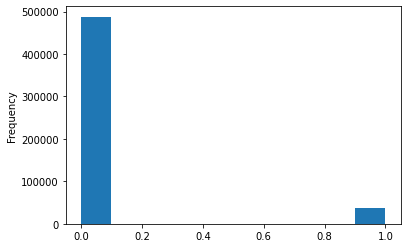

In [7]:
%matplotlib inline
shuffled_dataset['Target'].plot.hist()
#we see imbalance in the data below

#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing 
these features makes sense concerning the setting of the question. Apply the necessary transformations.

In [8]:
shuffled_dataset.filter([col for col in shuffled_dataset.columns if "DELAY" in col]).describe()

,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,525584.000000,525584.000000,525584.000000,525584.000000,525584.000000,525584.000000,525584.000000
mean,61.160798,65.121311,14.220132,0.078438,21.601131,25.729632,3.491977
std,78.722179,76.020795,31.385462,2.407145,57.413616,49.023326,24.447418
min,-32.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,38.000000,2.000000,0.000000,2.000000,3.000000,0.000000
75%,76.000000,75.000000,18.000000,0.000000,19.000000,30.000000,0.000000
max,1988.000000,1971.000000,1101.000000,573.000000,1971.000000,1294.000000,1211.000000


<AxesSubplot:xlabel='DESTINATION_AIRPORT'>

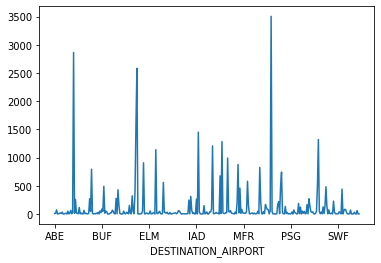

In [9]:
shuffled_dataset.groupby('DESTINATION_AIRPORT').sum('Target')['Target'].plot.line()

<AxesSubplot:xlabel='DESTINATION_AIRPORT'>

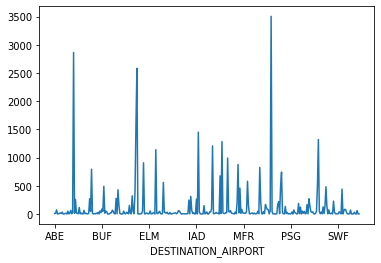

In [10]:
#Plotting to understand the relation b/w Destination airport and Arrival Delay i.e our target value
shuffled_dataset.groupby('DESTINATION_AIRPORT').sum('Target')['Target'].plot.line()

<AxesSubplot:xlabel='ORIGIN_AIRPORT'>

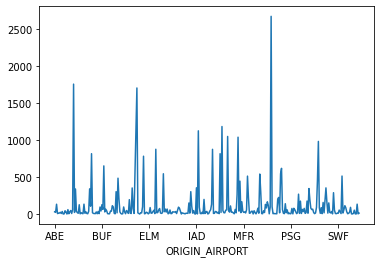

In [11]:
shuffled_dataset.groupby('ORIGIN_AIRPORT').sum('Target')['Target'].plot.line()

In [12]:
shuffled_dataset.groupby(['DESTINATION_AIRPORT','ORIGIN_AIRPORT']).sum('Target')['Target'].sort_values()

DESTINATION_AIRPORT  ORIGIN_AIRPORT
OAK                  DFW                 0
BQN                  FLL                 0
PIT                  CVG                 0
LGA                  GSP                 0
PIA                  MSP                 0
                                      ... 
ATL                  LGA               109
DFW                  ORD               110
LGA                  ORD               112
JFK                  LAX               116
ORD                  LGA               122
Name: Target, Length: 4597, dtype: int32

 <hr>
 
 Descriptive features we have decided based on the features which we will know at the time of flight booking. 
 Also, all the features containing delay have been removed, since these won't be available at time of booking and would also cause leakage to the target.:
 * 'Month',
 * 'DAY_OF_WEEK',
 * 'DAY',
 * 'AIRLINE',
 * 'DAY_YEARLY',
 * 'WEEK',
 * 'SCHEDULED_DEPARTURE',
 * 'SCHEDULED_ARRIVAL',
 * 'DISTANCE',
 * 'DESTINATION_AIRPORT',
 * 'ORIGIN_AIRPORT',
 * 'SCHEDULED_DEPARTURE_CATEGORY'

In [13]:
selected_columns = [
    'Month',
    'DAY_OF_WEEK',
    'DAY',
    'AIRLINE',
    'DAY_YEARLY',
    'WEEK',
    'SCHEDULED_DEPARTURE',
    'SCHEDULED_ARRIVAL'
    'DISTANCE',
    'DESTINATION_AIRPORT',
    'ORIGIN_AIRPORT',
    'SCHEDULED_DEPARTURE_CATEGORY',
    'Target'
]


#filtered the columns selected above from the complete shuffled dataset
filtered_dataset = shuffled_dataset.filter(selected_columns)

One Hot Encoding as the below features are categorical

In [14]:
cols_to_encode = ['AIRLINE', 'SCHEDULED_DEPARTURE_CATEGORY']
temp_df = pd.get_dummies(filtered_dataset.filter(cols_to_encode))
descriptive_feature_df = filtered_dataset.join(temp_df)

Target Encoding for Destination Airport and Origin Airport --- Because for some pairs of Destination and origin airport there are delayed flights present

In [15]:

target_encoding = ['DESTINATION_AIRPORT','ORIGIN_AIRPORT']

for col in target_encoding:
    x = descriptive_feature_df.groupby([col])['Target'].sum().reset_index()
    x = x.rename(columns={"Target" : "Target_sum"})

    y = descriptive_feature_df.groupby([col])['Target'].count().reset_index()
    y = y.rename(columns={"Target" : "Target_count"})

    z = pd.merge(x,y,on = col,how = 'inner')
    z[f'Target_Encoded_over_{col}'] = z['Target_sum']/z['Target_count']
    z = z[[col,f'Target_Encoded_over_{col}']]

    descriptive_feature_df = pd.merge(descriptive_feature_df,z,on = col,how = 'left')


descriptive_feature_df = descriptive_feature_df.drop(cols_to_encode+target_encoding,axis=1)

Split your data into training and testing data, with 85% of the dataset going to testing data.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(descriptive_feature_df.drop(['Target'],axis=1), descriptive_feature_df['Target'], test_size=0.85)


In [17]:
X_test.head(3)

,DAY_OF_WEEK,DAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,SCHEDULED_DEPARTURE_CATEGORY_Afternoon,SCHEDULED_DEPARTURE_CATEGORY_Evening,SCHEDULED_DEPARTURE_CATEGORY_Morning,SCHEDULED_DEPARTURE_CATEGORY_Night,Target_Encoded_over_DESTINATION_AIRPORT,Target_Encoded_over_ORIGIN_AIRPORT
151681,1,3,215,30,1715,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0.104004,0.089376
19075,5,12,163,23,1500,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.047009,0.043045
164363,1,21,264,37,1300,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0.052794,0.086433


In [18]:
y_train.value_counts()

0    73169
1     5668
Name: Target, dtype: int64

Treating imbalance in the training data
Steps:
* We are doing over-sampling(for class 1 ie flight delayed) using simple SMOTE from scratch.
* Then do down-sampling(for class 0 ie flight not delayed) using random down-sampling.
* Final data is balanced to 50%-50% classes with less data-points.

In [20]:
import random
from sklearn.neighbors import NearestNeighbors

def nearest_neighbour(X):
    nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
    euclidean,indices= nbs.kneighbors(X)
    return indices

def SMOTE_100(X):
    indices2 = nearest_neighbour(X)
    matrix=[]
    for m in range(len(indices2)):
        t=X[indices2[m]]
        newt=pd.DataFrame(t)
        matrix.append([])
        for j in range(len(newt.columns)):
            matrix[m].append(random.choice(newt[j]))
    return matrix

unique, counts = np.unique(y_train, return_counts=True)
minority_shape = dict(zip(unique, counts))[1]
x1 = np.ones((minority_shape, X_train.shape[1]))
x1=[X_train.iloc[i] for i, v in enumerate(y_train) if v==1.0]

x1=np.array(x1)

sampled_instances = SMOTE_100(x1)
X_TrainSMOTE = np.concatenate((X_train,sampled_instances), axis = 0)
y_sampled_instances = np.ones(minority_shape)
y_TrainSMOTE = np.concatenate((y_train,y_sampled_instances), axis=0)

X_TrainSMOTE = pd.DataFrame(X_TrainSMOTE)

X_TrainSMOTE.loc[:,'Target'] = y_TrainSMOTE

num_0 = len(X_TrainSMOTE[X_TrainSMOTE['Target']==0])
num_1 = len(X_TrainSMOTE[X_TrainSMOTE['Target']==1])
training_dataset = pd.concat([ X_TrainSMOTE[X_TrainSMOTE['Target']==0].sample(num_1) , X_TrainSMOTE[X_TrainSMOTE['Target']==1] ])

In [26]:
training_dataset['Target'].value_counts()

0.0    11336
1.0    11336
Name: Target, dtype: int64

#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

In [27]:
#you may put code here, if necessary
# We will be considering Recall as our goal is that the flights chosen by our model are actually delayed by at least 3 hours. So we cannot afford False positives --i.e the flight which is predicted to be delayed but is actually not.

    Your answer:
<hr> 
    We will be considering Recall as our goal is to build a model that predicts if the flights chosen by our model are actually delayed by at least 3 hours.
    So we cannot afford False positives --i.e the flights which is predicted to be delayed but is actually not delayed.
    
<hr>

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

Your answer:

<hr>

A random guess in case of binary classifier will have 50% recall ie 50% chance of getiing the flight in either of classes.
Hence, the baseline for our model is 50% Recall for Class:'1' i.e flights for which delay > 180 mins.

<hr>
    

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


#### a) Regression:
Train, finetune and evaluate a regression model.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

regression_params = {
    'C': [0.01, 0.5, 1],
     'penalty':['l2','l1'],
     'class_weight':['balanced',None]}

regression_model = GridSearchCV(
    LogisticRegression(solver = 'liblinear', multi_class = 'ovr', max_iter=300),
    regression_params,
    cv = 5,
    n_jobs=-1,
    verbose = 3) 
regression_model.fit(training_dataset.drop(['Target'], axis=1), training_dataset['Target'])
print(regression_model.best_params_) 
print(regression_model.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l1'}
0.5927580077318547


In [29]:
from sklearn.metrics import accuracy_score, recall_score, classification_report

y_pred_regression_model = regression_model.predict(X_test)
recall_score(y_test, y_pred_regression_model)*100

57.74314951323443

#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [34]:
# Your code
from sklearn.svm import SVC

svm_params = {
    'kernel': ['rbf'],
    'max_iter' : [700, 1200],
    'C' : [0.5, 1, 2],
}  
svm_model = GridSearchCV(
    SVC( class_weight = 'balanced'),
    svm_params, 
    cv = 5,
    n_jobs=-1,
    verbose = 3) 
svm_model.fit(training_dataset.drop(['Target'], axis=1), training_dataset['Target'])
print(svm_model.best_params_)
print(svm_model.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 0.5, 'kernel': 'rbf', 'max_iter': 700}
0.5165416753194898


C:\Users\Anurag\anaconda3\envs\common_env\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [35]:
y_pred_svm_model = svm_model.predict(X_test)
recall_score(y_test, y_pred_svm_model)*100

77.9167055457062

# c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [74]:
# Your code
from sklearn.model_selection import GridSearchCV
from sklearn import neural_network

nn_params = {'solver': ['sgd', 'adam'],
             'alpha': [0.0001, 0.01, 0.04, 0.07, 0.1], 
             'hidden_layer_sizes':[(100, 30), (100, 40), (100, 50)],
             'momentum' : [0.2, 0.8]}
mlp_model = GridSearchCV(neural_network.MLPClassifier(), nn_params, n_jobs=-1)
mlp_model.fit(training_dataset.drop(['Target'], axis=1),training_dataset['Target'].values.ravel())

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.01, 0.04, 0.07, 0.1],
                         'hidden_layer_sizes': [(100, 30), (100, 40),
                                                (100, 50)],
                         'momentum': [0.2, 0.8], 'solver': ['sgd', 'adam']})

In [75]:
mlp_model.best_params_

{'alpha': 0.01,
 'hidden_layer_sizes': (100, 40),
 'momentum': 0.2,
 'solver': 'adam'}

In [76]:
from sklearn.metrics import accuracy_score, recall_score, classification_report

y_pred_mlp_model = mlp_model.predict(X_test)
recall_score(y_test, y_pred_mlp_model)*100

86.92109110136543

### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

In [ ]:
# your code if needed

Your answer:

<hr>

We choose Neural Networks as our best generalized fiited model with Recall of 87% for Class 1(Delayed flight).

Let price for flight be X. Our model will be profitable if `X-150*Recall = 0` where 150 dollars is the given refund value.
So `X-150*0.87 = 0` => `X = 130 dollars`

<hr>

## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [111]:
# Your code
dataset_q4 = no_null_data

In [112]:
dataset_q4.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY,REIMBURSMENT
407896,407896,285205,201968,2015,8,26,3,UA,948,N446UA,...,N,10.0,0.0,16.0,0.0,0.0,238,34,Afternoon,0
235807,235807,615058,704937,2015,8,22,6,DL,2588,N3765,...,N,0.0,0.0,54.0,0.0,0.0,234,33,Afternoon,0
178915,178915,632181,798568,2015,4,8,3,DL,2068,N344NB,...,N,18.0,0.0,0.0,0.0,0.0,98,14,Morning,0
19702,19702,149329,422877,2015,4,30,4,AA,1079,N4YFAA,...,N,0.0,0.0,0.0,0.0,18.0,120,17,Evening,0
214158,214158,224748,296295,2015,4,9,4,EV,4335,N14168,...,N,0.0,0.0,0.0,26.0,0.0,99,14,Afternoon,0


In [113]:
dataset_q4_cleaned = no_null_data[(no_null_data['WEATHER_DELAY']<600)&(no_null_data['ARRIVAL_DELAY']<600)]

In [114]:
dataset_q4_cleaned.loc[:,'AIR_TIME_DELAY'] = dataset_q4_cleaned.ELAPSED_TIME - dataset_q4_cleaned.SCHEDULED_TIME

C:\Users\Anurag\anaconda3\envs\common_env\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [115]:
dataset_q4_cleaned['AIR_TIME_DELAY'].describe()

count    498240.000000
mean          3.972907
std          19.457150
min        -105.000000
25%          -9.000000
50%           0.000000
75%          14.000000
max         330.000000
Name: AIR_TIME_DELAY, dtype: float64

<AxesSubplot:ylabel='Frequency'>

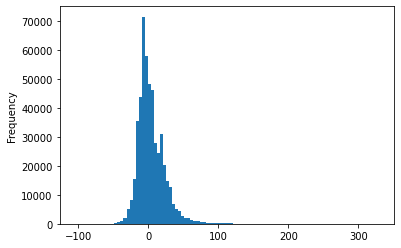

In [116]:
dataset_q4_cleaned['AIR_TIME_DELAY'].plot.hist(bins=100)

In [117]:
clustering_dataset = dataset_q4_cleaned.copy()

In [118]:
clustering_dataset.filter(['AIR_TIME_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME']).head(10)

,AIR_TIME_DELAY,SCHEDULED_TIME,ELAPSED_TIME
407896,10.0,172.0,182.0
235807,-6.0,167.0,161.0
178915,16.0,226.0,242.0
19702,-10.0,188.0,178.0
214158,-23.0,102.0,79.0
303893,2.0,175.0,177.0
311270,4.0,187.0,191.0
490851,-3.0,60.0,57.0
561064,-28.0,330.0,302.0
426410,-8.0,142.0,134.0


Your answer:

<hr>
The newly created feature has some significant negative values. The negative values depicts that flight took more time than the planned time i.e real > planned. Positive values show the flight was within the planned time i.e real < planned.

<hr>

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

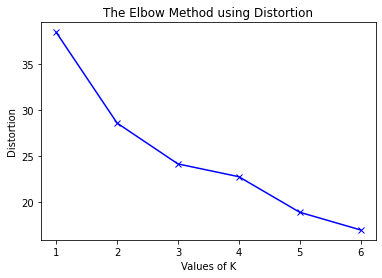

In [122]:
# Your code
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
X = clustering_dataset.filter(['AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'])
distortions = []
K = range(1, 7)
 
for k in K:
    # Building and fitting the model
    kmean_clf = KMeans(n_clusters=k, n_init=10).fit(X)
    distortions.append(sum(np.min(cdist(X, kmean_clf.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])

#Plotting the different cluster and their respective distortions
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#Train and assign the label using the final cluster K=5
final_clf = KMeans(n_clusters=5, random_state=42).fit(X)
prediction = final_clf.predict(X)
#Mapping the cluster values from numbers to asked labels
X['cluster'] = pd.Series(prediction, index=X.index).map({0:'c1', 1:'c2', 2:'c3', 3:'c4', 4:'c5'})

In [123]:
print("Center co-ordinates and their repective counts:\n")
for center_index, count in zip(final_clf.cluster_centers_, X['cluster'].value_counts().sort_index()):
    print(f"Co-ordinate of centroid -> {center_index}")
    print(f"Count of samples in cluster {count}\n")
    print("-----------------------------")

Center co-ordinates and their repective counts:

Co-ordinate of centroid -> [-5.11833149  1.39057694 11.11108916]
Count of samples in cluster 273490

-----------------------------
Co-ordinate of centroid -> [ -3.70828674   2.92294789 211.4011966 ]
Count of samples in cluster 17882

-----------------------------
Co-ordinate of centroid -> [-3.11849424  1.37343209 78.19832283]
Count of samples in cluster 70369

-----------------------------
Co-ordinate of centroid -> [ 11.05574846 177.44733796   9.44675926]
Count of samples in cluster 5184

-----------------------------
Co-ordinate of centroid -> [27.47509196  1.58276658  2.56291935]
Count of samples in cluster 131315

-----------------------------


    Your answer:
<hr>
Running KNN with different centroid seeds is necessary to introduce randomness and local convergence of KNN.
The final results will be the best output of n_init consecutive runs in terms of inertia.

<hr>

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

C:\Users\Anurag\anaconda3\envs\common_env\lib\site-packages\matplotlib\collections.py:1120: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


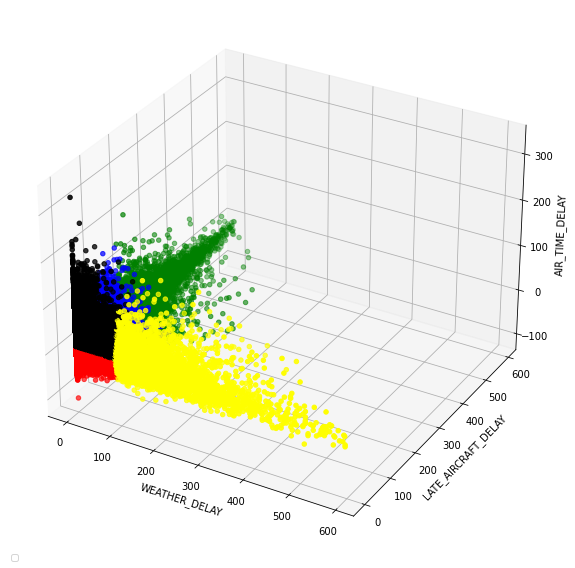

In [124]:
# Your code

import seaborn as sns
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
cdict = {
    'c1': "red",
    'c2': "green",
    'c3': "blue",
    'c4': "yellow",
    'c5': "black",
}
zdata = X['AIR_TIME_DELAY']
xdata = X['WEATHER_DELAY']
ydata = X['LATE_AIRCRAFT_DELAY']
labellist = X['cluster']
colorlist = labellist.map(cdict)
# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
scatter3d = ax.scatter3D(xdata, ydata, zdata, c=colorlist)
ax.set_xlabel('WEATHER_DELAY')
ax.set_ylabel('LATE_AIRCRAFT_DELAY')
ax.set_zlabel('AIR_TIME_DELAY')

plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0), handles=scatter3d.legend_elements()[0])
plt.savefig("./output/Q4_partb_3d.png", bbox_inches='tight')

In [128]:
X.groupby('cluster').agg({'WEATHER_DELAY':'mean', 'LATE_AIRCRAFT_DELAY':'mean', 'AIR_TIME_DELAY':'mean'})

,WEATHER_DELAY,LATE_AIRCRAFT_DELAY,AIR_TIME_DELAY
cluster,,,
c1,1.388925,11.123829,-5.119657
c2,2.919975,211.408679,-3.710827
c3,1.375620,78.251503,-3.114781
c4,177.447338,9.446759,11.055748
c5,1.585432,2.565366,27.474881


    Your answer:
    


<hr>

As clearly displayed in the `groupby` result and also from the cluster centers printed, following results can be derived:
* Cluster 5 has the data-points with maximum `Air time delay`
* Cluster 4 has the data-points with maximum `Weather delay`
* Cluster 2 has the data-points with maximum `Late aircraft delay`
* CLuster 3 and CLuster 1 have data points with cases where flights actually have less time in the air than expected giving them negative air time delay.

<hr>